<a href="https://colab.research.google.com/github/BDZG10/IntArt.FIME/blob/main/Actividades/AF8_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# Actividad 8: Redes Neuronales Convolucionales
# Equipo:
# N4 Cesar Ballin Rodriguez-2132117
# N4 Brandon Daniel Zavala Gaytan 2055952
# N4 Dylan Jesús Cuéllar Aranda 2042806
# N4 Letizia Isabel García Vargas 2056273
# N5 Erick Escárcega Esparza 2132268

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

2. Cargar Datos

In [87]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

3. Preprocesamiento de datos

In [88]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [89]:
# Normalizar los valores de píxeles a [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

4. Selección y entrenamiento del modelo

In [91]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Capa de salida con softmax
])

In [92]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
history = model.fit(train_images, train_labels,
                    epochs=5,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.8648 - loss: 0.4349 - val_accuracy: 0.9814 - val_loss: 0.0584
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9818 - loss: 0.0592 - val_accuracy: 0.9864 - val_loss: 0.0409
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.9877 - loss: 0.0392 - val_accuracy: 0.9875 - val_loss: 0.0341
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 54ms/step - accuracy: 0.9905 - loss: 0.0311 - val_accuracy: 0.9906 - val_loss: 0.0268
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 56ms/step - accuracy: 0.9934 - loss: 0.0213 - val_accuracy: 0.9877 - val_loss: 0.0346


5. Prueba del modelo

In [96]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nExactitud en datos de prueba: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9832 - loss: 0.0446

Exactitud en datos de prueba: 0.9877


In [97]:
predictions = model.predict(test_images)
sample_indices = np.random.choice(len(test_images), 5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


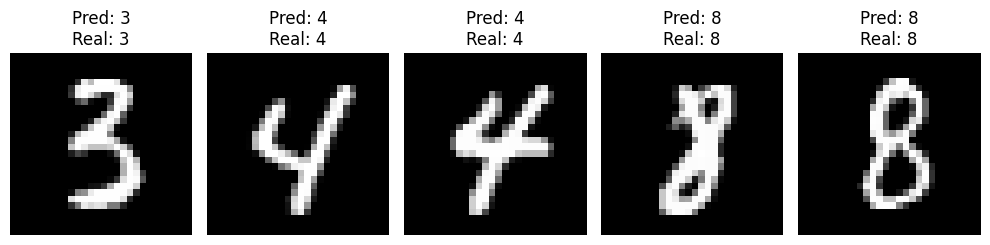

In [98]:
plt.figure(figsize=(10, 5))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[idx])
    true_label = np.argmax(test_labels[idx])
    plt.title(f'Pred: {predicted_label}\nReal: {true_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()